# Asssignment04 

## 1) Delivery_time -> Predict delivery time using sorting time 

------------------------------------------------------------

## Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
del_time=pd.read_csv('/content/drive/MyDrive/Datasets/Linear Regression/delivery_time.csv')

In [ ]:
del_time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
del_time.shape

(21, 2)

In [ ]:
del_time.describe

<bound method NDFrame.describe of     Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5>

In [ ]:
del_time[del_time.duplicated()]

,Delivery Time,Sorting Time


In [ ]:
del_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


### Let's try to findout Outlier with the help of verious graphs and plots.

{'boxes': [<matplotlib.lines.Line2D at 0x7fa45297c950>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa452491210>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa4524ace90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa4524ac950>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa45784ca10>,
  <matplotlib.lines.Line2D at 0x7fa45749d450>]}

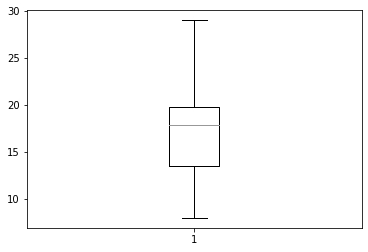

In [ ]:
plt.boxplot(del_time['Delivery Time'],vert = True)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa4523a0610>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa4523a5690>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa4523ad6d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa4523ad190>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa4523a0bd0>,
  <matplotlib.lines.Line2D at 0x7fa4523a5150>]}

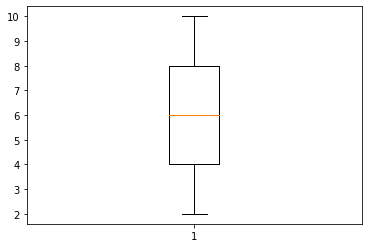

In [ ]:
plt.boxplot(del_time['Sorting Time'],vert = True)

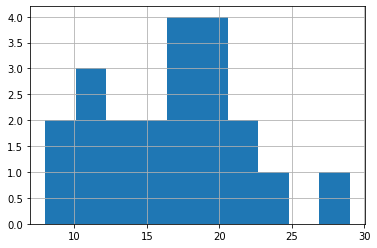

In [ ]:
del_time['Delivery Time'].hist()

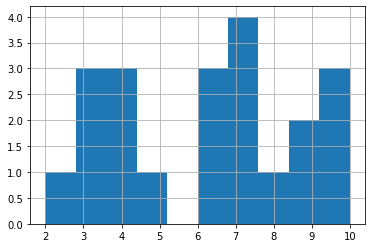

In [ ]:
del_time['Sorting Time'].hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


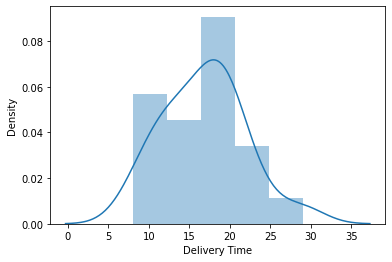

In [ ]:
sns.distplot(del_time['Delivery Time'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


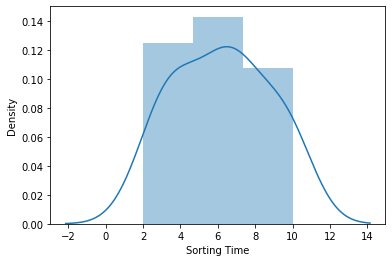

In [ ]:
sns.distplot(del_time['Sorting Time'])

In [ ]:
del_time.isnull()

,Delivery Time,Sorting Time
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


#### In our datast there is no any null values, missing values, duplicates And Outlier so no need to treat it.

### Correlatin

In [ ]:
del_time.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


### Correlation Coefficient only applicable for numeric columns

### Corr - 0.82 is defines a strong relation bet^n Dellivery time and Sorting time so,  we can build the model.  

In [ ]:
# Standardize data
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions

In [ ]:
array=del_time.values
scaler=StandardScaler().fit(array)
rescaledx=scaler.transform(array)

In [ ]:
set_printoptions(precision=2)
print(rescaledx[:,0:2])

[[ 0.85  1.54]
 [-0.66 -0.88]
 [ 0.6  -0.08]
 [ 1.46  1.13]
 [ 2.47  1.54]
 [-0.29 -0.08]
 [ 0.45  0.33]
 [-1.47 -1.29]
 [ 0.22  1.54]
 [ 0.4   1.13]
 [ 0.61  0.73]
 [-1.22 -0.88]
 [-0.02  0.33]
 [-1.07 -1.29]
 [-0.96 -1.29]
 [-0.39 -0.88]
 [-0.61 -0.08]
 [ 0.27  0.33]
 [-1.78 -1.69]
 [ 0.21  0.33]
 [ 0.95 -0.48]]


In [ ]:
del_time.rename(columns = {'Delivery Time': 'Delivery_Time', 'Sorting Time': 'Sorting_Time'}, inplace = True)

In [ ]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
model1=smf.ols("Delivery_Time~Sorting_Time",data=del_time).fit()
model1.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 14 Jan 2022   Prob (F-statistic):           3.98e-06
Time:                        06:38:24   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred=model1.predict(del_time.iloc[:,1]) #model1 predict "sorting time"
pred
model1.resid
model1.resid_pearson

array([-0.70630355,  0.10943679,  1.11524837,  0.87774154,  2.01950985,
       -0.383949  ,  0.2978383 , -0.69160484, -1.76255624, -0.9110735 ,
        0.01877637, -0.82756157, -0.49264758, -0.0101515 ,  0.17043364,
        0.5796396 , -0.92911167, -0.00540844, -0.64082979, -0.10081191,
        2.27338512])

In [ ]:
rmse=np.sqrt(np.mean((np.array(del_time['Delivery_Time'])-np.array(pred))**2))
rmse

2.7916503270617654

In [ ]:
#R squared values
R1=(model1.rsquared,model1.rsquared_adj)
R1

(0.6822714748417231, 0.6655489208860244)

In [ ]:
newdf=pd.Series([9,15,12,16,11,21,19])
data_pred=pd.DataFrame(newdf,columns=['Sorting_Time'])
model1.predict(data_pred)

0    21.423913
1    31.318032
2    26.370973
3    32.967052
4    24.721953
5    41.212152
6    37.914112
dtype: float64

In [ ]:
model2=smf.ols('Delivery_Time~np.log(Sorting_Time)',data=del_time).fit()
model2.params

Intercept               1.159684
np.log(Sorting_Time)    9.043413
dtype: float64

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 14 Jan 2022   Prob (F-statistic):           2.64e-06
Time:                        07:07:02   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred2=model2.predict(del_time.iloc[:,1])  #model2.predict(df["Sorting_Time"])
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [ ]:
rmse=np.sqrt(np.mean((np.array(del_time['Delivery_Time'])-np.array(pred2))**2))
rmse

2.733171476682066

In [ ]:
#R squared values
R2=(model2.rsquared,model2.rsquared_adj)
R2

(0.6954434611324224, 0.6794141696130762)

In [ ]:
# exponential TRASFORMATION
model3=smf.ols('np.log(Delivery_Time)~Sorting_Time',data=del_time).fit()
model3.params

Intercept       2.121372
Sorting_Time    0.105552
dtype: float64

In [ ]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Fri, 14 Jan 2022   Prob (F-statistic):           1.59e-06
Time:                           07:11:02   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred3=model3.predict(del_time.iloc[:,1])  #model3.predict(df["Sorting_Time"])
pred3

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [ ]:
rmse=np.sqrt(np.mean((np.array(del_time['Delivery_Time'])-np.array(pred3))**2))
rmse

14.795516941016684

In [ ]:
newdf=pd.Series([9,15,12,16,11,21,19])
data_pred=pd.DataFrame(newdf,columns=['Sorting_Time'])
model3.predict(data_pred)

0    3.071336
1    3.704646
2    3.387991
3    3.810197
4    3.282439
5    4.337955
6    4.126852
dtype: float64

In [ ]:
#R squared values
R3=(model3.rsquared,model3.rsquared_adj)
R3

(0.7109478980584187, 0.6957346295351776)

In [ ]:
R1

(0.6822714748417231, 0.6655489208860244)

In [ ]:
R2

(0.6954434611324224, 0.6794141696130762)

In [ ]:
R3

(0.7109478980584187, 0.6957346295351776)

### After compairing all tis 3 Rsquare values of 3 different models we can conclude that  R3 which is belongs to model3 is a better model than others.

## model3 is Better than others
